In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip


## Importing data

In [3]:
df_features = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip')
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [5]:
df_features.count()

Store           8190
Date            8190
Temperature     8190
Fuel_Price      8190
MarkDown1       4032
MarkDown2       2921
MarkDown3       3613
MarkDown4       3464
MarkDown5       4050
CPI             7605
Unemployment    7605
IsHoliday       8190
dtype: int64

In [6]:
df_stores = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [8]:
df_stores.count()

Store    45
Type     45
Size     45
dtype: int64

In [9]:
df_train = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
df_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
df_train.count()

Store           421570
Dept            421570
Date            421570
Weekly_Sales    421570
IsHoliday       421570
dtype: int64

In [12]:
df_train[(df_train.Date == '2010-02-05') 
         & (df_train.Store == 1)
         & (df_train.Dept == 1)]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.5,False


In [13]:
print(df_train[(df_train.Store == 1)
         & (df_train.Dept == 1)].Date.max())

print(df_train[(df_train.Store == 1)
         & (df_train.Dept == 1)].Date.min())

2012-10-26
2010-02-05


## Merging data

In [14]:
df_merged = (df_train.merge(df_stores, how='left', left_on = ["Store"], right_on = ["Store"])
             .merge(df_features.drop(columns=["IsHoliday"], axis=1), how='left', left_on = ["Store", "Date"], right_on = ["Store", "Date"]))

In [15]:
df_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [16]:
df_merged.count()

Store           421570
Dept            421570
Date            421570
Weekly_Sales    421570
IsHoliday       421570
Type            421570
Size            421570
Temperature     421570
Fuel_Price      421570
MarkDown1       150681
MarkDown2       111248
MarkDown3       137091
MarkDown4       134967
MarkDown5       151432
CPI             421570
Unemployment    421570
dtype: int64

In [17]:
df_merged.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


## Feature engineering

### Time dependent features

In [18]:
def transform_to_datetime(dataframe, column):
    df = dataframe.copy()
    df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d", errors="raise")
    return df

def get_time_features(dataframe):
    df = dataframe.copy()
    df["month"] = df.Date.dt.month
    df["dow"] = df.Date.dt.dayofweek
    df["year"] = df.Date.dt.year
    return df

def get_cyclic_time_features(dataframe):
    df = dataframe.copy()
    df["dow_sin"] = np.sin((df.dow) * (2. * np.pi / 7))
    df["dow_cos"] = np.cos((df.dow) * (2. * np.pi / 7))
    df["month_sin"] = np.sin((df.month - 1) * (2. * np.pi / 12))
    df["month_cos"] = np.cos((df.month - 1) * (2. * np.pi / 12))
    return df

In [19]:
df_merged = transform_to_datetime(df_merged, 'Date')
df_merged = get_time_features(df_merged)
df_merged = get_cyclic_time_features(df_merged)

In [20]:
df_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,dow,year,dow_sin,dow_cos,month_sin,month_cos
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,4,2010,-0.433884,-0.900969,0.500000,0.866025
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2,4,2010,-0.433884,-0.900969,0.500000,0.866025
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2,4,2010,-0.433884,-0.900969,0.500000,0.866025
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2,4,2010,-0.433884,-0.900969,0.500000,0.866025
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,3,4,2010,-0.433884,-0.900969,0.866025,0.500000


### Encoding categorical variables 

In [21]:
df_merged.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [22]:
print(df_merged.groupby(["Type"])["Weekly_Sales"].mean())
print(df_merged.groupby(["Type"])["Weekly_Sales"].std())

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64
Type
A    26423.457227
B    17203.668989
C    15985.351612
Name: Weekly_Sales, dtype: float64


In [23]:
df_merged.groupby(["Type"])["Type"].count()

Type
A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [24]:
def get_distribution_numerical_variable(dataframe, column):
    df = dataframe.copy()
    plt.figure(figsize=(13,5))
    sns.distplot(df[column], color="blue")
    plt.title(column)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df[column].mean(), color = "black", linestyle="dashed", label="mean")
    plt.axvline(df[column].std(), color = "red", linestyle="dotted", label="std")
    plt.legend(loc="upper right")
    print ("Distribution of " + column)

Distribution of Weekly_Sales


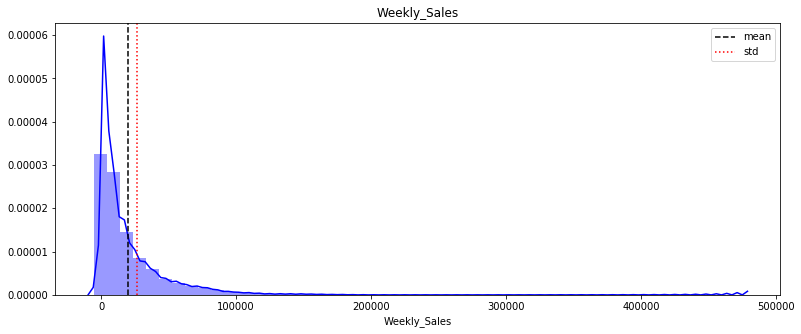

In [25]:
get_distribution_numerical_variable(df_merged[df_merged.Type=='A'], "Weekly_Sales")

Distribution of Weekly_Sales


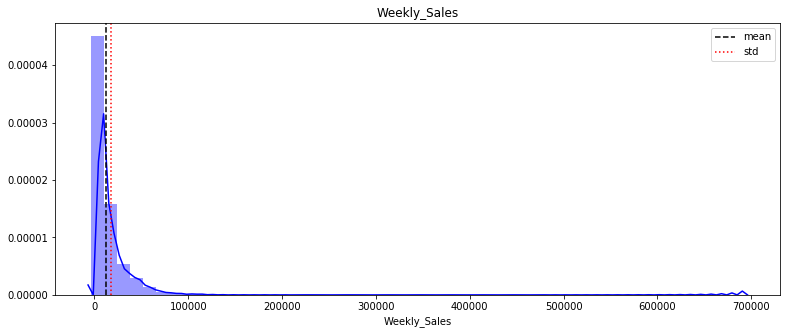

In [26]:
get_distribution_numerical_variable(df_merged[df_merged.Type=='B'], "Weekly_Sales")

Distribution of Weekly_Sales


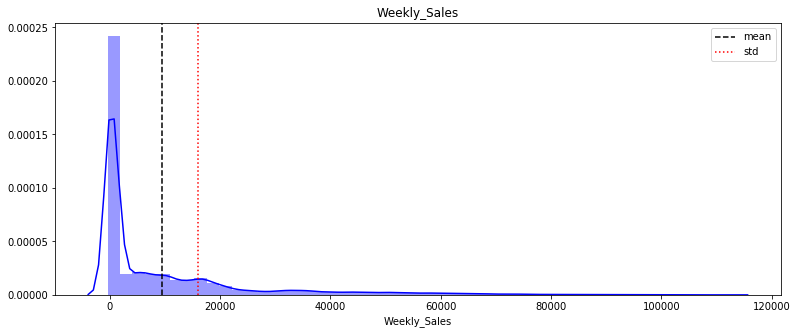

In [27]:
get_distribution_numerical_variable(df_merged[df_merged.Type=='C'], "Weekly_Sales")

In [28]:
df_merged.IsHoliday.unique()

array([False,  True])

Distribution of Weekly_Sales


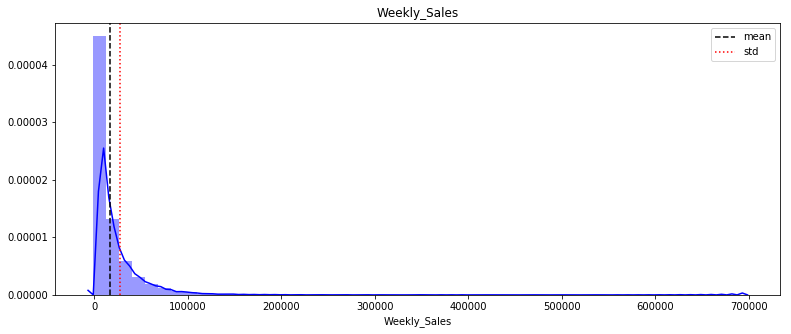

In [29]:
get_distribution_numerical_variable(df_merged[df_merged.IsHoliday==True], "Weekly_Sales")

Distribution of Weekly_Sales


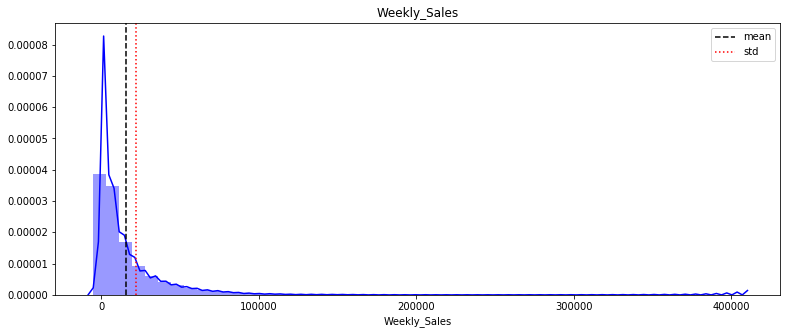

In [30]:
get_distribution_numerical_variable(df_merged[df_merged.IsHoliday==False], "Weekly_Sales")

In [31]:
print(df_merged.groupby(["IsHoliday"])["Weekly_Sales"].mean())
print(df_merged.groupby(["IsHoliday"])["Weekly_Sales"].std())

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64
IsHoliday
False    22330.747450
True     27222.000409
Name: Weekly_Sales, dtype: float64


In [32]:
df_merged["IsHoliday"] = df_merged.IsHoliday.astype(str)
df_merged["year"] = df_merged.year.astype(str)

In [33]:
#df_merged = pd.get_dummies(df_merged)

### correlation matrix

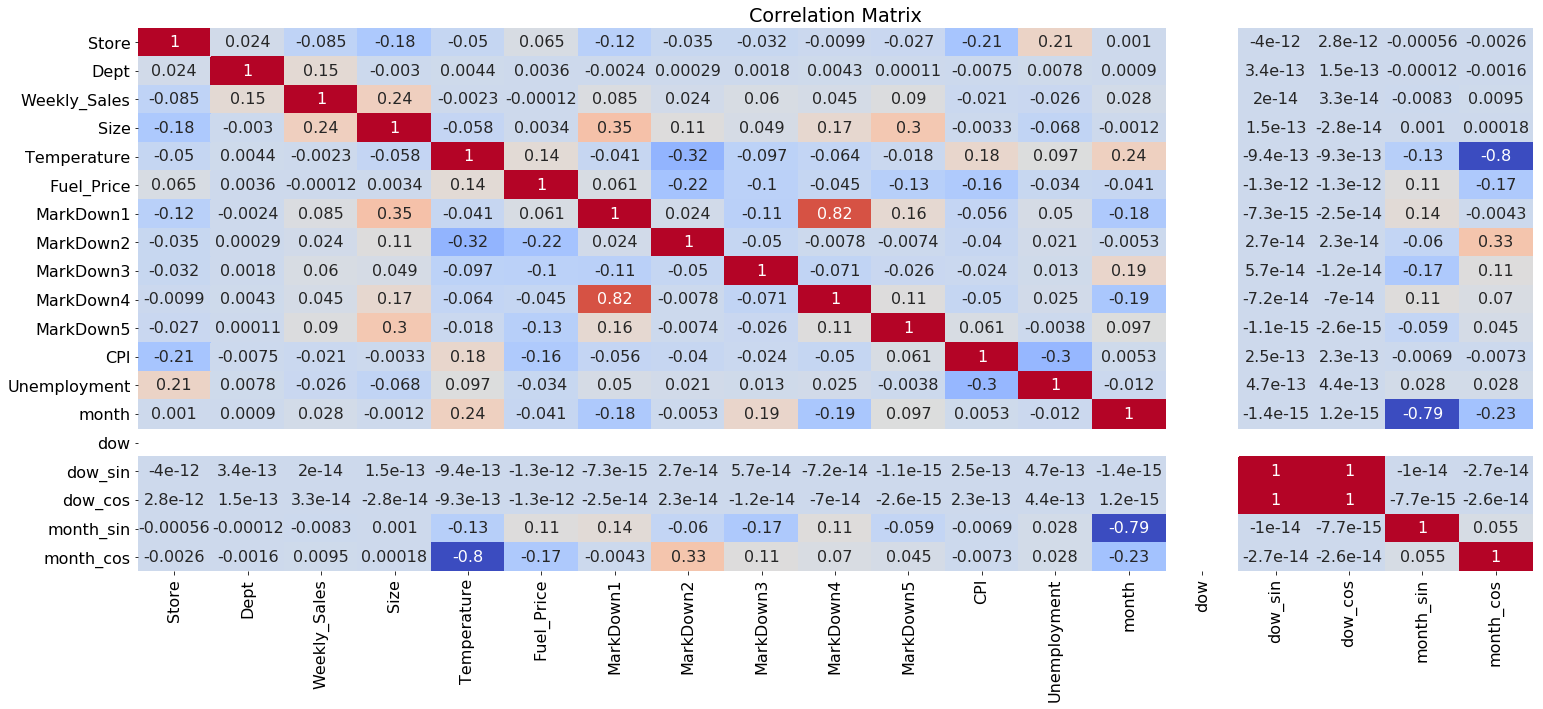

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
correlation = newdf = df_merged.select_dtypes(include=numerics).corr(method='pearson')

plt.rcParams.update({'font.size':16})
fig, ax = plt.subplots(figsize=(25,10))

sns.heatmap(correlation, annot=True,
            cmap=plt.get_cmap('coolwarm'),
            cbar=False, ax=ax)

plt.title("Correlation Matrix")
plt.show()

In [35]:
df_merged.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [36]:
df_merged.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

## Pipeline

In [37]:
df_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,dow,year,dow_sin,dow_cos,month_sin,month_cos
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,4,2010,-0.433884,-0.900969,0.500000,0.866025
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2,4,2010,-0.433884,-0.900969,0.500000,0.866025
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2,4,2010,-0.433884,-0.900969,0.500000,0.866025
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2,4,2010,-0.433884,-0.900969,0.500000,0.866025
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,3,4,2010,-0.433884,-0.900969,0.866025,0.500000


In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [39]:
#Cleaning (Missing values, create for further developments a class to treat the Outliers (?)) 
class ImputerModified(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        X_copy.fillna(0, inplace=True)
        return X_copy
    
#Drop variables considered not useful at least for a first MVP
class DataFrameDropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names_to_drop):
        self.attribute_names = attribute_names_to_drop
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        X_copy.drop(self.attribute_names, axis=1, inplace=True)
        return X_copy
    
#Hot encoding for categorical variable
class DataFrameHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_to_encode):
        self.attribute_names = attributes_to_encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        X_copy = pd.get_dummies(X_copy, columns=self.attribute_names)
        return X_copy

#Standard Scaler for numerical variables
class DataFrameScaler(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_to_scale):
        self.attribute_names = attributes_to_scale
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        scaled_features = X.copy()
        features = scaled_features[self.attribute_names]
        scaler = StandardScaler().fit(features.values)
        features = scaler.transform(features.values)
        # Save scaler for testset
        scaler_filename = "scaler_train_data.save"
        joblib.dump(scaler, scaler_filename) 
        X_copy[self.attribute_names] = features
        return X_copy
    
#Stratified KFold Target Encoding (very important to avoid data leakage problems)
class KFoldMeanEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, target_variable, attributes_to_encode, fold_number):
        self.target_feature = target_variable
        self.cat_features = attributes_to_encode
        self.n_fold = fold_number
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        mean_of_target = X_copy[self.target_feature].mean()
        skf = KFold(n_splits = self.n_fold, shuffle = True, random_state=2019)
        X_tr = X_copy.drop(self.target_feature, axis=1)
        y_tr = X_copy[self.target_feature]
        i=0
        #here X_tr are all the data, not just training 
        for tr_ind, val_ind in skf.split(X_tr, y_tr):
            x_tr, x_val = X_copy.iloc[tr_ind], X_copy.iloc[val_ind]
            #print(tr_ind, val_ind)
            i+=1
            for cat in self.cat_features:
                print('encoding ' + cat + ' in ' + str(i) + ' fold')
                col_mean_name = cat + '_' + 'kf_mean_encoded'
                X_copy.loc[X.index[val_ind], col_mean_name] = x_val[cat].map(x_tr.groupby(cat)[self.target_feature].mean())
                #here we could also think to use the median instead of the mean.
                X_copy[col_mean_name].fillna(mean_of_target, inplace = True)   
        X_copy.drop(self.cat_features, axis=1, inplace=True)
        return X_copy

In [40]:
columns_to_drop = ["Date", "month", "dow"]

categorical_variables = ['Type',
                         'IsHoliday',
                         'Store',
                         'Dept',
                         'year']

columns_to_scale = ['Size', 
                    'Temperature', 
                    'Fuel_Price', 
                    'MarkDown1', 
                    'MarkDown2', 
                    'MarkDown3', 
                    'MarkDown4', 
                    'MarkDown5', 
                    'CPI', 
                    'Unemployment', 
                    'dow_sin', 
                    'dow_cos', 
                    'month_sin', 
                    'month_cos']

columns_for_hot_encoding = ['Type',
                            'IsHoliday',
                            'year']

columns_for_mean_encoding = ['Store', 'Dept']

In [41]:
pipe_preproc = Pipeline([
    ('DFDC', DataFrameDropColumns(columns_to_drop)),
    ('IM', ImputerModified()),
    ('DFS', DataFrameScaler(columns_to_scale)),
    ('DFHE', DataFrameHotEncoding(columns_for_hot_encoding)),
    ('KFSME', KFoldMeanEncoding(target_variable='Weekly_Sales', 
                                attributes_to_encode=columns_for_mean_encoding,
                                fold_number=4))
])

df_merged_processed = pipe_preproc.transform(df_merged)

encoding Store in 1 fold
encoding Dept in 1 fold
encoding Store in 2 fold
encoding Dept in 2 fold
encoding Store in 3 fold
encoding Dept in 3 fold
encoding Store in 4 fold
encoding Dept in 4 fold


In [42]:
df_merged_processed

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,dow_sin,dow_cos,month_sin,month_cos,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True,year_2010,year_2011,year_2012,Store_kf_mean_encoded,Dept_kf_mean_encoded
0,24924.50,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,0.078201,0.0,1.0,0.644926,1.362812,1,0,0,1,0,1,0,0,21767.784714,19560.120340
1,46039.49,0.239209,-1.169783,-1.773177,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.022498,0.078201,0.0,1.0,0.644926,1.362812,1,0,0,0,1,1,0,0,21767.784714,19560.120340
2,41595.55,0.239209,-1.092810,-1.847330,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.023697,0.078201,0.0,1.0,0.644926,1.362812,1,0,0,1,0,1,0,0,21701.824165,19047.302873
3,19403.54,0.239209,-0.729625,-1.744825,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.024476,0.078201,0.0,1.0,0.644926,1.362812,1,0,0,1,0,1,0,0,21831.883051,19137.262062
4,21827.90,0.239209,-0.736672,-1.605243,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.025255,0.078201,0.0,1.0,1.155946,0.834218,1,0,0,1,0,1,0,0,21831.883051,19137.262062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,508.37,-0.303489,0.259647,1.387032,0.324919,-0.169009,-0.084391,0.132976,0.386317,0.531461,0.388404,0.0,1.0,-1.262229,-0.609929,0,1,0,1,0,0,0,1,11527.044897,6813.932687
421566,628.10,-0.303489,0.260189,1.360860,0.405901,-0.173069,-0.081259,0.300498,0.160955,0.535467,0.379281,0.0,1.0,-1.449276,0.112144,0,1,0,1,0,0,0,1,11826.795056,6811.094538
421567,1061.02,-0.303489,-0.304645,1.393575,-0.104718,-0.173069,-0.083235,-0.124229,0.553226,0.539472,0.379281,0.0,1.0,-1.449276,0.112144,0,1,0,1,0,0,0,1,11605.055644,6792.525040
421568,760.01,-0.303489,-0.196231,1.325965,-0.096830,-0.173069,-0.084087,-0.165720,-0.029775,0.539564,0.379281,0.0,1.0,-1.449276,0.112144,0,1,0,1,0,0,0,1,11695.287964,6881.033469


In [54]:
X_train = df_merged_processed.drop(['Weekly_Sales'], axis=1)
y_train = df_merged_processed['Weekly_Sales']

cv = KFold(n_splits=4, shuffle=True, random_state=2019)
Lr = LinearRegression()
Rf = RandomForestRegressor(n_estimators=30, max_depth=10, n_jobs=-1)

In [55]:
scores = cross_validate(Rf, X_train, y_train, cv=cv,
                        scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error'], 
                        return_train_score=True)

print(scores)

{'fit_time': array([16.5703342 , 16.82476068, 16.37060428, 16.23749375]), 'score_time': array([0.35058069, 0.34408641, 0.34483767, 0.34432888]), 'test_r2': array([0.88011922, 0.86909725, 0.88284528, 0.8704092 ]), 'train_r2': array([0.9036892 , 0.90193134, 0.90225722, 0.90487672]), 'test_neg_mean_squared_error': array([-61524236.60616245, -67033359.02335642, -60691268.07743493,
       -67367071.61912118]), 'train_neg_mean_squared_error': array([-49759768.92116912, -50704786.39135089, -50342155.55438957,
       -48935915.39617394]), 'test_neg_mean_absolute_error': array([-3865.55674487, -4012.40095386, -3685.9016931 , -3886.72149472]), 'train_neg_mean_absolute_error': array([-3500.68805268, -3516.3816302 , -3528.50035392, -3494.71811099])}


random forest with max depth 6

In [45]:
for score in scores:
    if 'test_' in score or 'train_' in score:
        print("{}: {:.3f}".format(score, scores[score].mean()))

test_r2: 0.805
train_r2: 0.810
test_neg_mean_squared_error: -100674831.916
train_neg_mean_squared_error: -97938055.830
test_neg_mean_absolute_error: -5274.891
train_neg_mean_absolute_error: -5236.194


In [46]:
print("validation RMSE: {:.3f}".format(((-scores['test_neg_mean_squared_error'])**(1/2)).mean()))

validation RMSE: 10032.862


random forest with max depth 10:

In [56]:
for score in scores:
    if 'test_' in score or 'train_' in score:
        print("{}: {:.3f}".format(score, scores[score].mean()))

test_r2: 0.876
train_r2: 0.903
test_neg_mean_squared_error: -64153983.832
train_neg_mean_squared_error: -49935656.566
test_neg_mean_absolute_error: -3862.645
train_neg_mean_absolute_error: -3510.072


In [57]:
print("validation RMSE: {:.3f}".format(((-scores['test_neg_mean_squared_error'])**(1/2)).mean()))

validation RMSE: 8007.333


linear regression as benchmark

In [47]:
scores = cross_validate(Lr, X_train, y_train, cv=cv,
                        scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error'], 
                        return_train_score=True)

print(scores)

{'fit_time': array([0.2850132 , 0.28505087, 0.29341316, 0.30172658]), 'score_time': array([0.0605998 , 0.03117824, 0.03584027, 0.03606129]), 'test_r2': array([0.6556982 , 0.66127152, 0.65149729, 0.65209816]), 'train_r2': array([0.65498574, 0.65314715, 0.65639492, 0.65619144]), 'test_neg_mean_squared_error': array([-1.76699765e+08, -1.73457837e+08, -1.80539637e+08, -1.80854882e+08]), 'train_neg_mean_squared_error': array([-1.78254457e+08, -1.79334551e+08, -1.76972873e+08, -1.76871397e+08]), 'test_neg_mean_absolute_error': array([-8162.51788212, -8171.99172511, -8161.02770715, -8123.20860343]), 'train_neg_mean_absolute_error': array([-8156.34209816, -8144.09229986, -8148.98097273, -8166.46929027])}


In [48]:
for score in scores:
    if 'test_' in score or 'train_' in score:
        print("{}: {:.3f}".format(score, scores[score].mean()))

test_r2: 0.655
train_r2: 0.655
test_neg_mean_squared_error: -177888030.440
train_neg_mean_squared_error: -177858319.844
test_neg_mean_absolute_error: -8154.686
train_neg_mean_absolute_error: -8153.971


In [49]:
print("validation RMSE: {:.3f}".format(((-scores['test_neg_mean_squared_error'])**(1/2)).mean()))

validation RMSE: 13336.980


## Gridsearch

In [53]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

grid = {
    'max_depth' : [5, 6, 7, 8, 9, 10]
}

cv = KFold(n_splits=4, shuffle=True, random_state=2019)
Rf = RandomForestRegressor(n_estimators=30, n_jobs=-1)
search = GridSearchCV(estimator=Rf, param_grid=grid, cv=cv, 
                      verbose=3, n_jobs=-1, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

print(search.best_params_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.4min finished


{'max_depth': 10}
